In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [2]:
# Loading the admission data
dataset = pd.read_csv('admissions_data.csv')
print(dataset.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
print(dataset.describe())
print(dataset.shape)

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [4]:
labels = dataset.iloc[:, -1]
features = dataset.iloc[:, 0:8]
print(labels, features)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312

In [5]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(400, 8) (100, 8) (400,) (100,)


In [7]:
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [8]:
features_train_scale = pd.DataFrame(features_train_scale, columns=features_train.columns)
features_test_scale = pd.DataFrame(features_test_scale, columns=features_test.columns)

In [26]:
# Building the model
def design_model(feature_data):
    model = Sequential()
    num_features = feature_data.shape[1]
    input = tf.keras.Input(shape=(num_features,))
    model.add(input)
    hidden_layer = layers.Dense(16, activation='relu')
    model.add(hidden_layer)
    model.add(layers.Dropout(0.1))
    hidden_layer_2= layers.Dense(8, activation='relu')
    model.add(hidden_layer_2)
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    opt= keras.optimizers.Adam(learning_rate=0.005)
    model.compile(loss='mse',metrics=['mae'], optimizer=opt)
    return model

In [27]:
model = design_model(features_train_scale)
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [29]:
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100,batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.3562 - mae: 0.4883 - val_loss: 0.0391 - val_mae: 0.1585
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0969 - mae: 0.2518 - val_loss: 0.0174 - val_mae: 0.1055
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0417 - mae: 0.1609 - val_loss: 0.0121 - val_mae: 0.0866
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mae: 0.1513 - val_loss: 0.0091 - val_mae: 0.0771
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mae: 0.1212 - val_loss: 0.0103 - val_mae: 0.0886
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mae: 0.1042 - val_loss: 0.0084 - val_mae: 0.0767
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mae: 0.0962 - val_loss: 0.0062 - val_mae: 0.0638
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mae: 0.0858 - val_loss: 0.0054 - val_mae: 0.0527
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [31]:
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose=0)
print('MAE:', val_mae)

MAE: 0.04461048170924187


In [32]:
y_pred = model.predict(features_test_scale)
print(r2_score(labels_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
0.8204531550303326


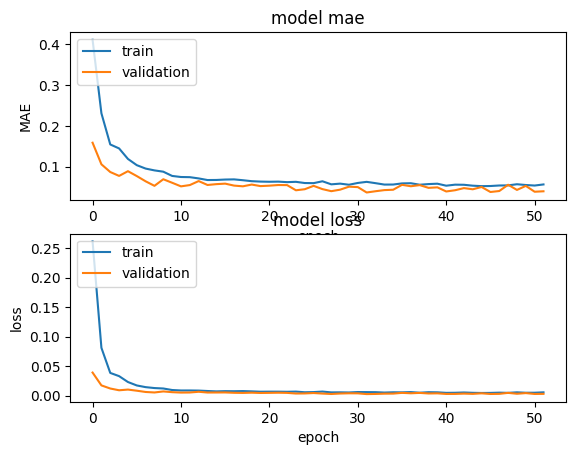

In [34]:
# Plot MAE and val_MAE for each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss for each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()
